In [12]:
from cvd_boyaca import get_data

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style()
plt.rcParams.update({
    "text.usetex": True,
#  "font.family": "serif",
# "font.serif": ["Palatino"],
})

import locale
locale.setlocale(locale.LC_ALL, '')

'LC_CTYPE=en_US.UTF-8;LC_NUMERIC=es_CO.UTF-8;LC_TIME=es_CO.UTF-8;LC_COLLATE=en_US.UTF-8;LC_MONETARY=es_CO.UTF-8;LC_MESSAGES=en_US.UTF-8;LC_PAPER=es_CO.UTF-8;LC_NAME=es_CO.UTF-8;LC_ADDRESS=es_CO.UTF-8;LC_TELEPHONE=es_CO.UTF-8;LC_MEASUREMENT=es_CO.UTF-8;LC_IDENTIFICATION=es_CO.UTF-8'

In [2]:
df, nombres_provincias, download_date = get_data()

******************************
******************************
Data download date & time 
 2021-06-20 11:24:31.970865 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80879 entries, 0 to 80878
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   fecha_reporte_web      80879 non-null  object
 1   id_de_caso             80879 non-null  object
 2   fecha_de_notificaci_n  80879 non-null  object
 3   departamento           80879 non-null  object
 4   departamento_nom       80879 non-null  object
 5   ciudad_municipio       80879 non-null  object
 6   ciudad_municipio_nom   80879 non-null  object
 7   edad                   80879 non-null  object
 8   unidad_medida          80879 non-null  object
 9   sexo                   80879 non-null  object
 10  fuente_tipo_contagio   80696 non-null  object
 11  ubicacion              80879 non-null  object
 12  estado                 80879 non-null  object
 13  r

## Resumen de casos por Provincia y por municipio

In [3]:
resumen_p = df.pivot_table(index="provincia_tildes", columns="recuperado", values="id_de_caso", aggfunc=np.count_nonzero).fillna(0)
resumen_p = resumen_p.sort_values("Activo", ascending=False)
#resumen["T"] = resumen.sum(axis=1) # Compute total observations to compare with number of "ID de caso"
resumen_p.astype(int).head(20)

# count "ID de caso" to compare with same calculation from the "Recuperado Column"
#df.groupby("Nombre municipio")["ID de caso"].agg(np.count_nonzero).sort_values(ascending=False)

recuperado,Activo,Fallecido,Recuperado
provincia_tildes,,,
Centro,1215,457,24781
Tundama,476,515,16696
Sugamuxi,461,503,15975
Occidente,330,316,8753
Ricaurte,110,150,3299
Neira,84,45,1224
Márquez,57,33,1037
Lengupá,45,20,339
Oriente,37,39,987


In [6]:
resumen_m = df.pivot_table(index="ciudad_municipio_nom", columns="recuperado", values="id_de_caso", aggfunc=np.count_nonzero).fillna(0)
resumen_m = resumen_m.sort_values("Activo", ascending=False)
#resumen["T"] = resumen.sum(axis=1) # Compute total observations to compare with number of "ID de caso"
print(resumen_m.astype(int).head(20))

# count "ID de caso" to compare with same calculation from the "Recuperado Column"
#df.groupby("Nombre municipio")["ID de caso"].agg(np.count_nonzero).sort_values(ascending=False)
top6 = resumen_m.sort_values("Activo", ascending=False).head(6).reset_index()["ciudad_municipio_nom"]
print("\n\nTOP 6\n",top6)

recuperado             Activo  Fallecido  Recuperado
ciudad_municipio_nom                                
TUNJA                    1058        348       21063
DUITAMA                   380        397       13495
SOGAMOSO                  379        434       13548
CHIQUINQUIRA              245        155        4634
GARAGOA                    63         41         956
PAIPA                      62         77        2373
SAMACA                     61         31        1224
PUERTO BOYACA              45         97        2733
MIRAFLORES                 40         14         248
MONIQUIRA                  30         68        1409
VILLA DE LEYVA             24         35         714
SOTAQUIRA                  21          2          91
NOBSA                      21         14        1002
FIRAVITOBA                 16          6         153
ARCABUCO                   16          5         139
TOCA                       15          3         245
AQUITANIA                  15         11      

In [7]:
# Tag top-6 towns as "TOP 6" in provincia column
index_top6 = df["ciudad_municipio_nom"].isin(top6)
df.loc[index_top6,"provincia_mayuscula"] = "TOP 6"
df.loc[index_top6,"provincia_tildes"] = "Municipios con más Casos"

# List of Provincias
provincias = nombres_provincias["provincia_mayuscula"].value_counts()
provincias = list(provincias.index)
provincias.append("TOP 6")
print(provincias)

provincias_tildes = nombres_provincias["provincia_tildes"].value_counts()
provincias_tildes = list(provincias_tildes.index)
provincias_tildes.append("Municipios con más Casos")
print(provincias_tildes)


['OCCIDENTE', 'CENTRO', 'SUGAMUXI', 'RICAURTE', 'MARQUEZ', 'TUNDAMA', 'NORTE', 'ORIENTE', 'GUTIERREZ', 'VALDERRAMA', 'LENGUPA', 'NEIRA', 'LA LIBERTAD', 'TOP 6']
['Occidente', 'Centro', 'Ricaurte', 'Sugamuxi', 'Márquez', 'Norte', 'Tundama', 'Oriente', 'Gutiérrez', 'Valderrama', 'Lengupá', 'Neira', 'La Libertad', 'Municipios con más Casos']


Procesando Datos de Provincia --- OCCIDENTE


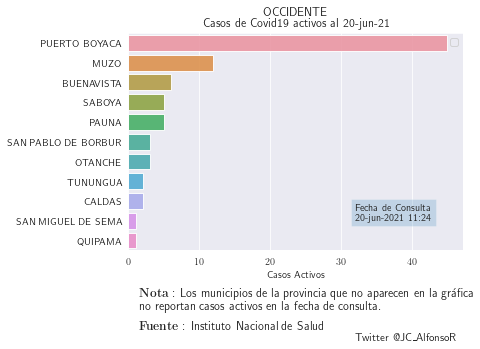

Procesando Datos de Provincia --- CENTRO


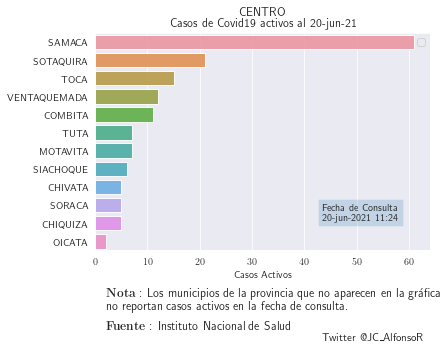

Procesando Datos de Provincia --- SUGAMUXI


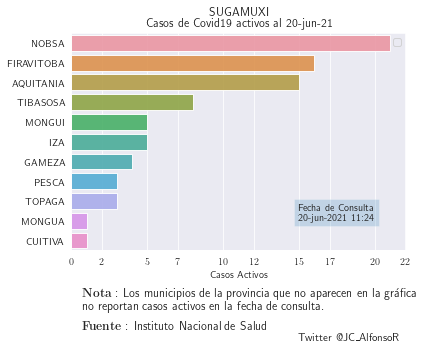

Procesando Datos de Provincia --- RICAURTE


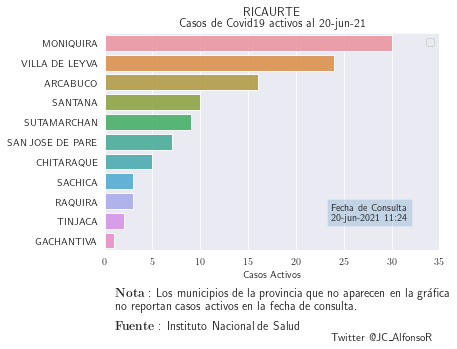

Procesando Datos de Provincia --- MARQUEZ


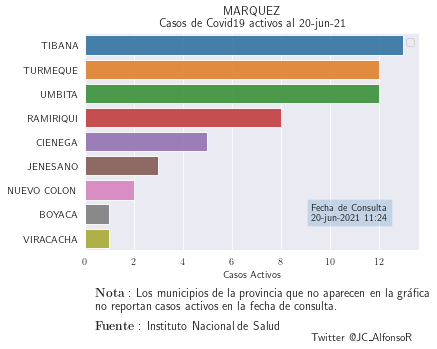

Procesando Datos de Provincia --- TUNDAMA


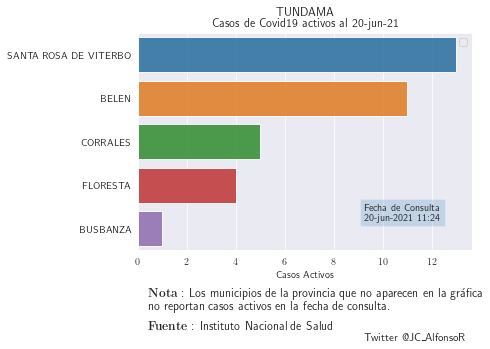

Procesando Datos de Provincia --- NORTE


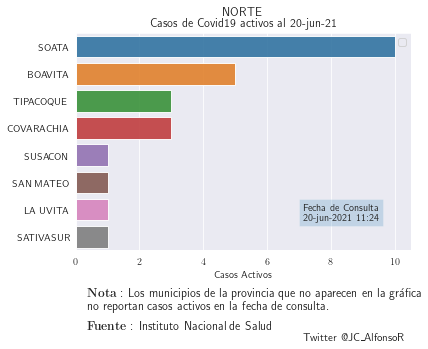

Procesando Datos de Provincia --- ORIENTE


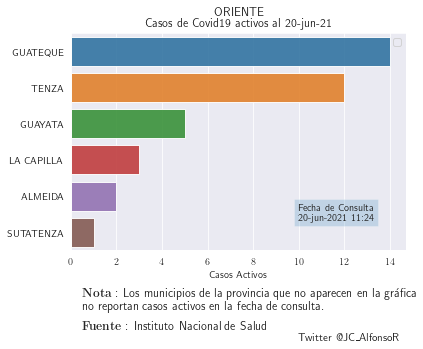

Procesando Datos de Provincia --- GUTIERREZ


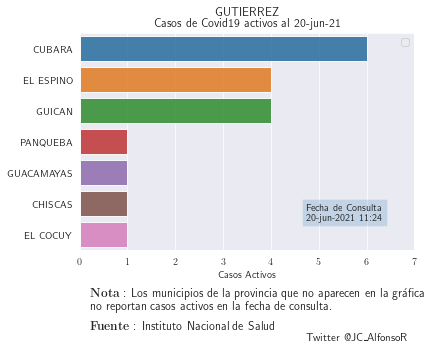

Procesando Datos de Provincia --- VALDERRAMA


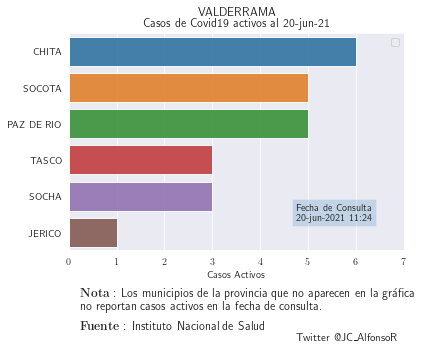

Procesando Datos de Provincia --- LENGUPA


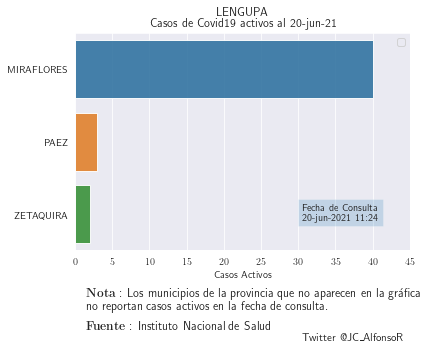

Procesando Datos de Provincia --- NEIRA


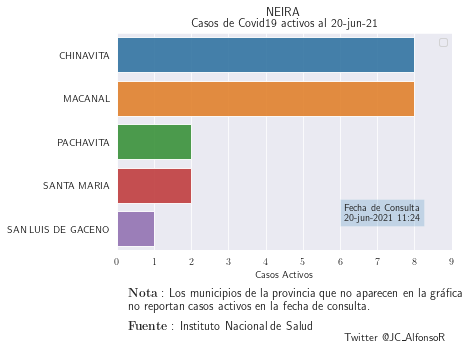

Procesando Datos de Provincia --- LA LIBERTAD


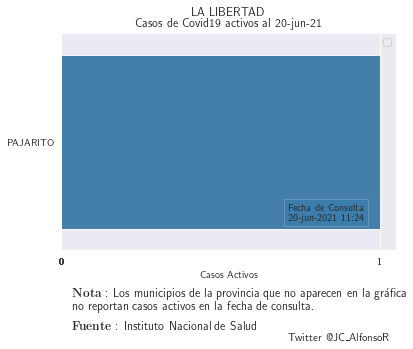

Procesando Datos de Provincia --- TOP 6


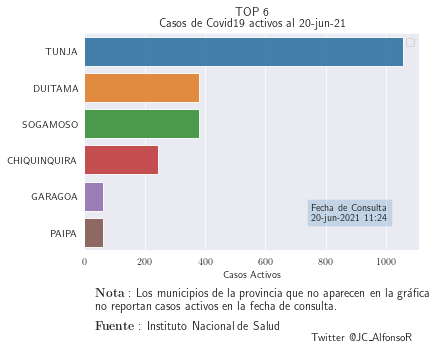

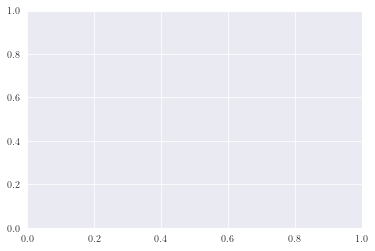

In [8]:
sns.set_style("darkgrid")

for provincia in provincias:
    print("Procesando Datos de Provincia ---", provincia)
    
    
    # Subset data
    #q1 = "recuperado=='Activo' or recuperado=='Fallecido'"
    q2 = "recuperado=='Activo'"
    df_subset = df.query(q2)
    df_subset = df_subset[df_subset.provincia_mayuscula==provincia]
    order_list = df_subset["ciudad_municipio_nom"].value_counts().index

    #Plot data
    g = sns.countplot(data=df_subset,
                 y="ciudad_municipio_nom", 
                       alpha=0.9,
                      order = order_list)
                    #hue="recuperado",
    #for p in ax.patches:
            #ax.annotate('{:f}'.format(p.get_height()), (p.get_x(), p.get_height()))
            #ax.annotate('{:d}'.format(p.get_width()), (p.get_width(),p.get_y()+0.5))

    # Miscellaneous
    g.set(xlabel= "Casos Activos",
          ylabel="",
          title= provincia + "\n Casos de Covid19 activos al " + download_date.strftime('%d-%b-%y'))
          #yticklabels=p_names_to_show)
    #plt.ylabel("")
    #plt.legend()
    #g.set_yticklabels(p_names_to_show)
    #plt.figtext(0.5, 0.01, "one text and next text", ha="center", fontsize=18, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

    # Make Sure x_ticks are ints
    old_ticks = g.get_xticks()
    floats_in_ticks = np.any(np.mod(old_ticks,2)!=0)
    if floats_in_ticks:
        new_ticks = old_ticks.astype(int)
        g.set_xticks(new_ticks)
    plt.legend("")
    disclaimer = r"$\bf{Fuente}$ : Instituto Nacional de Salud"

    disclaimer2 = r"$\bf{Nota}$ :" + " Los municipios de la provincia que no aparecen en la gráfica \nno reportan casos activos en la fecha de consulta."
    author = r"Twitter @JC\_AlfonsoR" 
    disclaimer4 = "Fecha de Consulta\n" + download_date.strftime('%d-%b-%Y %H:%M')

    figtext_start_y = -0.08
    fs = 12
    figtext_start_x = 0.15

    plt.figtext(figtext_start_x, 
                figtext_start_y-0.07, 
                disclaimer, 
                ha="left", fontsize=fs, wrap=True)

    plt.figtext(figtext_start_x, 
                figtext_start_y, 
                disclaimer2, 
                ha="left", fontsize=fs, wrap=True)

    plt.figtext(0.65, 
                figtext_start_y-1.5*0.07, 
                author, 
                ha="left", fontsize=fs-1, wrap=True)

    plt.figtext(0.65,
                0.23, 
                disclaimer4, 
                bbox={"alpha":0.2})
    
    #plt.tight_layout() # Make matplotlib save the whole figure content -> dont cut anything
    plt.savefig("log/"+provincia+'_'+download_date.strftime('%d_%m_%y_%H_%M')+'.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.cla()

In [9]:
diccionario_provincias = nombres_provincias.set_index("provincia_mayuscula")["provincia_tildes"]
diccionario_provincias = diccionario_provincias.drop_duplicates()

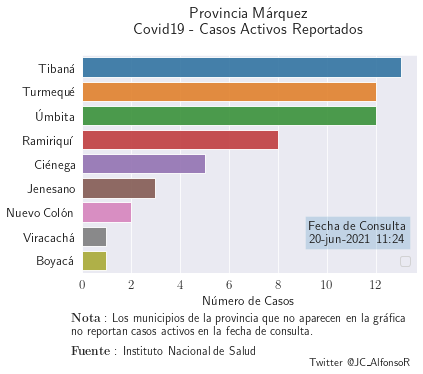

In [10]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 13
#  "font.family": "serif",
# "font.serif": ["Palatino"],
})

# Extract info from selected provincia
provincia = "MARQUEZ"

# Subset data
q1 = "recuperado=='Activo' or recuperado=='Fallecido'"
q2 = "recuperado=='Activo'"
df_subset = df.query(q2)
df_subset = df_subset[df_subset.provincia_mayuscula==provincia]
order_list = df_subset["municipio_tildes"].value_counts().index

#Plot data
g = sns.countplot(data=df_subset,
             y="municipio_tildes", 
                   alpha=0.9,
                  order = order_list)

#for p in g.patches:
        #g.annotate('{:d}'.format(p.get_width()), (p.get_width()+0.3,p.get_y()+0.5))

provincia_nombre = diccionario_provincias[provincia]
x_label =  "Número de Casos" 
title = "Provincia " + provincia_nombre + "\nCovid19 - Casos Activos Reportados\n"
# Miscellaneous
g.set(xlabel= x_label,
      ylabel="")
      #title=title)
plt.title(title)
plt.legend("")
#g.set_yticklabels(p_names_to_show)

# Make Sure x_ticks are ints
old_ticks = g.get_xticks()
floats_in_ticks = np.any(np.mod(old_ticks,2)!=0)
if floats_in_ticks:
    new_ticks = old_ticks.astype(int)
    g.set_xticks(new_ticks)
number =1

disclaimer = r"$\bf{Fuente}$ : Instituto Nacional de Salud"

disclaimer2 = r"$\bf{Nota}$ :" + " Los municipios de la provincia que no aparecen en la gráfica \nno reportan casos activos en la fecha de consulta."
author = r"Twitter @JC\_AlfonsoR" 
disclaimer4 = "Fecha de Consulta\n" + download_date.strftime('%d-%b-%Y %H:%M')

figtext_start_y = -0.09
fs = 12
figtext_start_x = 0.1

plt.figtext(figtext_start_x, 
            figtext_start_y-0.07, 
            disclaimer, 
            ha="left", fontsize=fs, wrap=True)

plt.figtext(figtext_start_x, 
            figtext_start_y, 
            disclaimer2, 
            ha="left", fontsize=fs, wrap=True)

plt.figtext(0.65, 
            figtext_start_y-1.5*0.07, 
            author, 
            ha="left", fontsize=fs-1, wrap=True)

plt.figtext(0.65,
            0.23, 
            disclaimer4, 
            bbox={"alpha":0.2})


#plt.autoscale()
#plt.tight_layout() # Make matplotlib save the whole figure content -> dont cut anything
plt.savefig('p.png',dpi=300,bbox_inches='tight')

# Time Series

In [13]:
# Generate dummi variables to easily create the time series
d_recuperado = pd.get_dummies(df["recuperado"], prefix='d')
d_df = pd.concat([df, d_recuperado], axis=1) 
d_df = d_df.drop(columns=["recuperado","d_Activo"])
d_df.head()

,id_de_caso,ciudad_municipio_nom,edad,f_reporte_web,f_notificacion,f_ini_sintomas,f_muerte,f_diagnostico,f_recuperacion,Poblacion_2020,bandera,municipio_tildes,provincia_tildes,provincia_mayuscula,d_Fallecido,d_Recuperado
0,445,SANTANA,57,2020-03-25,2020-03-23,2020-03-13,NaT,2020-03-25,2020-04-06,7671,https://upload.wikimedia.org/wikipedia/commons...,Santana,Ricaurte,RICAURTE,0,1
1,489,TUNJA,69,2020-03-26,2020-03-23,2020-03-22,NaT,2020-03-26,2020-04-06,203500,https://upload.wikimedia.org/wikipedia/commons...,Tunja,Municipios con más Casos,TOP 6,0,1
2,690,OICATA,72,2020-03-29,2020-03-28,2020-03-25,NaT,2020-03-29,2020-04-11,2831,https://upload.wikimedia.org/wikipedia/commons...,Oicatá,Centro,CENTRO,0,1
3,703,SANTANA,73,2020-03-30,2020-03-24,2020-03-18,NaT,2020-03-30,2020-04-13,7671,https://upload.wikimedia.org/wikipedia/commons...,Santana,Ricaurte,RICAURTE,0,1
4,864,TUNJA,84,2020-03-31,2020-03-26,2020-03-22,2020-04-04,2020-03-31,NaT,203500,https://upload.wikimedia.org/wikipedia/commons...,Tunja,Municipios con más Casos,TOP 6,1,0


In [14]:
# Create time series for active, recovered, passaway
# Each time series requires to be done independently

# Create acumulate time series using pivot tables
new_cases = d_df.pivot_table(index="f_ini_sintomas", 
                                  values="id_de_caso", 
                                  columns="ciudad_municipio_nom", 
                                  aggfunc=np.count_nonzero)
cum_new_cases = new_cases.sort_index(ascending=True).cumsum() 

new_rec = d_df.pivot_table(index="f_recuperacion",
                                values="d_Recuperado",
                                columns="ciudad_municipio_nom",
                                aggfunc=np.count_nonzero)
cum_rec = new_rec.sort_index(ascending=True).cumsum()

new_pa = d_df.pivot_table(index="f_muerte",
                              values="d_Fallecido",
                              columns="ciudad_municipio_nom",
                              aggfunc=np.count_nonzero)
cum_pa = new_pa.sort_index(ascending=True).cumsum()

In [15]:
# Resample all 3 time series in the same index so they can be summed
d_min = min([d_df.f_ini_sintomas.min(), d_df.f_recuperacion.min()])
d_max = max([d_df.f_ini_sintomas.max(), d_df.f_recuperacion.max()])
t_index = pd.date_range(start=d_min, end=d_max, freq='D')
print(d_min, d_max, sep="\n")

# Use pad() to fill values to the front and fillna(0) to fill NaN with 0
r_cum_new_cases = cum_new_cases.reindex(t_index).pad().fillna(0)
r_cum_rec = cum_rec.reindex(t_index).pad().fillna(0)
r_cum_pa = cum_pa.reindex(t_index).pad().fillna(0)

# Compute active cases: cumulative new cases - cummulative recovered - cummulative p.a.
active_cases = r_cum_new_cases - r_cum_rec - r_cum_pa

2020-03-13 00:00:00
2021-06-19 00:00:00


## Provincia Marquez

Text(0.5, 1.0, 'Casos Activos')

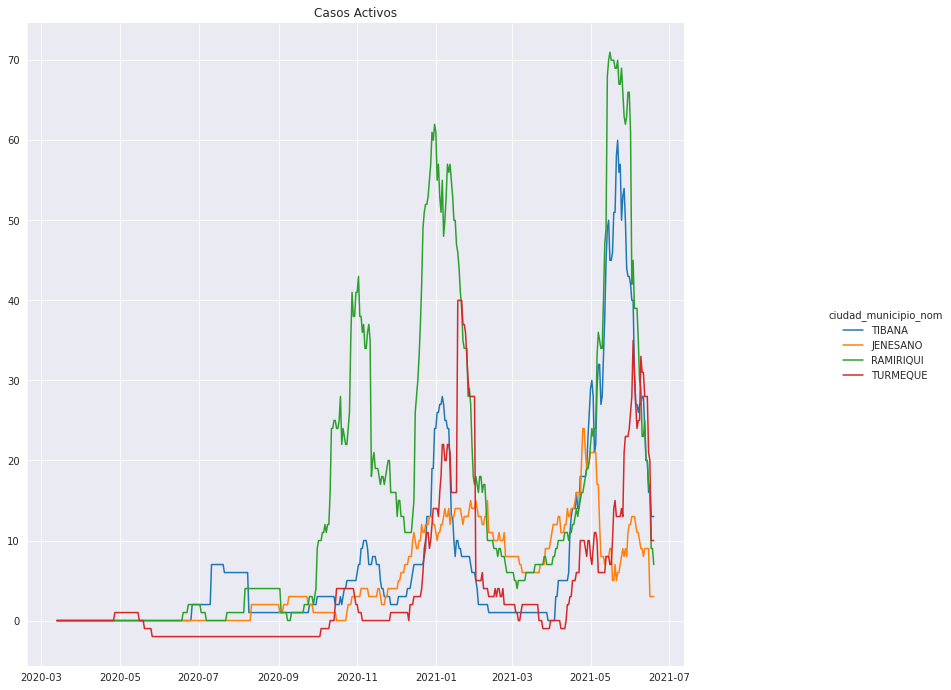

In [16]:
sns.set_style("darkgrid")
plt.rcParams.update({
    "text.usetex": False,
#  "font.family": "serif",
# "font.serif": ["Palatino"],
})


towns = ["TIBANA", "JENESANO", "RAMIRIQUI","TURMEQUE"]

g = sns.relplot(data=active_cases.loc[active_cases.index > "2020-01-01",towns],
           kind='line',
           dashes=False)

g.fig.set_size_inches(14,10)
#plt.grid()
plt.title("Casos Activos")
#plt.grid('both')
#old_ticks = g.ax.get_yticks()
#new_ticks = old_ticks.astype(int)
#g.ax.set_yticks(new_ticks)


# To Flourish

Export the time series of number of notified cases by town

In [17]:
df.info()
# f_reporte_web and f_notificacion are the only complete columns containing dates

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80878 entries, 0 to 80877
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_de_caso            80878 non-null  object        
 1   ciudad_municipio_nom  80878 non-null  object        
 2   edad                  80878 non-null  int64         
 3   recuperado            80878 non-null  object        
 4   f_reporte_web         80878 non-null  datetime64[ns]
 5   f_notificacion        80878 non-null  datetime64[ns]
 6   f_ini_sintomas        80304 non-null  datetime64[ns]
 7   f_muerte              2187 non-null   datetime64[ns]
 8   f_diagnostico         80870 non-null  datetime64[ns]
 9   f_recuperacion        75834 non-null  datetime64[ns]
 10  Poblacion_2020        80878 non-null  int64         
 11  bandera               80490 non-null  object        
 12  municipio_tildes      80878 non-null  object        
 13  provincia_tildes

In [18]:
# Explore relationships between dates
df["diff"] = (df["f_reporte_web"] - df["f_notificacion"]) / np.timedelta64(1, 'D')
print("All data\n", df["diff"].describe(), "\n\n")
print("When f_reporte_web > f_notification\n", df.query("diff>0")["diff"].describe())

All data
 count    80878.000000
mean         9.423094
std          8.441634
min        -49.000000
25%          4.000000
50%          8.000000
75%         13.000000
max        271.000000
Name: diff, dtype: float64 


When f_reporte_web > f_notification
 count    80121.000000
mean         9.513099
std          8.428357
min          1.000000
25%          4.000000
50%          8.000000
75%         13.000000
max        271.000000
Name: diff, dtype: float64


In [19]:
# Print the anomalous data
df.query("diff<0").head(20)

,id_de_caso,ciudad_municipio_nom,edad,recuperado,f_reporte_web,f_notificacion,f_ini_sintomas,f_muerte,f_diagnostico,f_recuperacion,Poblacion_2020,bandera,municipio_tildes,provincia_tildes,provincia_mayuscula,diff
304,69763,SOGAMOSO,36,Recuperado,2020-06-22,2020-06-23,2020-06-22,NaT,2020-06-28,2020-07-11,112790,https://upload.wikimedia.org/wikipedia/commons...,Sogamoso,Municipios con más Casos,TOP 6,-1.0
2134,460347,TUNJA,19,Recuperado,2020-08-16,2020-08-18,2020-08-09,NaT,2020-08-21,2020-09-01,203500,https://upload.wikimedia.org/wikipedia/commons...,Tunja,Municipios con más Casos,TOP 6,-2.0
3115,543537,TUNJA,38,Recuperado,2020-08-24,2020-08-26,2020-08-26,NaT,2020-08-28,2020-09-18,203500,https://upload.wikimedia.org/wikipedia/commons...,Tunja,Municipios con más Casos,TOP 6,-2.0
3138,549354,TUNJA,4,Recuperado,2020-08-24,2020-08-26,2020-08-26,NaT,2020-08-28,2020-09-18,203500,https://upload.wikimedia.org/wikipedia/commons...,Tunja,Municipios con más Casos,TOP 6,-2.0
8341,870215,CHIQUINQUIRA,14,Recuperado,2020-10-07,2020-10-09,2020-10-08,NaT,2020-10-09,2020-10-23,66203,https://upload.wikimedia.org/wikipedia/commons...,Chiquinquirá,Municipios con más Casos,TOP 6,-2.0
9712,917665,TUNJA,60,Recuperado,2020-10-12,2020-11-30,2020-09-30,NaT,2020-10-11,2020-10-31,203500,https://upload.wikimedia.org/wikipedia/commons...,Tunja,Municipios con más Casos,TOP 6,-49.0
10696,952992,TUNJA,21,Recuperado,2020-10-18,2020-10-24,2020-10-21,NaT,2020-11-04,2020-11-09,203500,https://upload.wikimedia.org/wikipedia/commons...,Tunja,Municipios con más Casos,TOP 6,-6.0
12874,1031215,TUNJA,22,Recuperado,2020-10-27,2020-11-02,2020-11-02,NaT,2020-11-02,2020-11-28,203500,https://upload.wikimedia.org/wikipedia/commons...,Tunja,Municipios con más Casos,TOP 6,-6.0
24103,1417456,PAIPA,83,Recuperado,2020-12-13,2020-12-21,2020-12-21,NaT,2020-12-21,2021-01-04,31021,https://upload.wikimedia.org/wikipedia/commons...,Paipa,Municipios con más Casos,TOP 6,-8.0


The expected behavior is first notify, then report on the web

For the above few observations it was reversed. It Might be an error. 

Time discrepancies for 9 observations out of >70k is not significant in the graphics. So, I am going to process the Floursih data based on notitification date

In [20]:
# Data to export to Flourish
# Create time series of new cases

# Create acumulate time series using pivot tables
notified_cases = df.pivot_table(index="f_notificacion", 
                                  values="id_de_caso", 
                                  columns="ciudad_municipio_nom", 
                                  aggfunc=np.count_nonzero)
cum_notified_cases = notified_cases.sort_index(ascending=True).cumsum()


# Resample time series
d_min = df["f_notificacion"].min()
d_max = df["f_notificacion"].max()
t_index = pd.date_range(start=d_min, end=d_max, freq='D')
print("Initial & Final Dates", d_min, d_max, sep="\n")

# Use pad() to fill NaN values to the front and fillna(0) to fill the remaining NaN with 0
r_cum_notified_cases = cum_notified_cases.reindex(t_index).pad().fillna(0)

Initial & Final Dates
2020-03-23 00:00:00
2021-06-17 00:00:00


In [21]:
# Print date interval
d_min = df["f_reporte_web"].min()
d_max = df["f_reporte_web"].max()
print("Initial & Final Dates", d_min, d_max, sep="\n")

Initial & Final Dates
2020-03-25 00:00:00
2021-06-19 00:00:00


In [22]:
# Check for NaN
print(r_cum_notified_cases.isna().any(), "\n")
print(r_cum_notified_cases.isna().any().any())

ciudad_municipio_nom
ALMEIDA           False
AQUITANIA         False
ARCABUCO          False
BELEN             False
BERBEO            False
                  ...  
UMBITA            False
VENTAQUEMADA      False
VILLA DE LEYVA    False
VIRACACHA         False
ZETAQUIRA         False
Length: 123, dtype: bool 

False


In [ ]:
# Transpose data because Flourish requires each town as a row
# Merge with nombres_provincias to load names, procincias and flag url
to_flourish = r_cum_notified_cases.T.merge(nombres_provincias, on="ciudad_municipio_nom", how='left')
to_flourish_p1000c = to_flourish.copy()
to_flourish_p1000c.iloc[:,1:-5] = to_flourish_p1000c.iloc[:,1:-5].div(to_flourish_p1000c.Poblacion_2020/1000, axis=0) # cases per 1000 hab

to_flourish = to_flourish.reset_index().drop(columns="index")
to_flourish_p1000c = to_flourish_p1000c.reset_index().drop(columns="index")

# Tag the top 6 towns
index_top6 = to_flourish["ciudad_municipio_nom"].isin(top6)
to_flourish.loc[index_top6,"provincia_mayuscula"] = "TOP 6"
to_flourish.loc[index_top6,"provincia_tildes"] = "Municipios con más Casos"

# Write CSV File
to_flourish.to_csv("timeSeries_Boyaca.csv")
to_flourish_p1000c.to_csv("timeSeries_p1000c_Boyaca.csv")

In [24]:
# Use terminal commands to delete 00:00:00 from the dates
!sed 's/00\:00\:00//g' timeSeries_Boyaca.csv -i
!sed 's/00\:00\:00//g' timeSeries_p1000c_Boyaca.csv -i
!head -1 timeSeries_Boyaca.csv

,ciudad_municipio_nom,2020-03-23 ,2020-03-24 ,2020-03-25 ,2020-03-26 ,2020-03-27 ,2020-03-28 ,2020-03-29 ,2020-03-30 ,2020-03-31 ,2020-04-01 ,2020-04-02 ,2020-04-03 ,2020-04-04 ,2020-04-05 ,2020-04-06 ,2020-04-07 ,2020-04-08 ,2020-04-09 ,2020-04-10 ,2020-04-11 ,2020-04-12 ,2020-04-13 ,2020-04-14 ,2020-04-15 ,2020-04-16 ,2020-04-17 ,2020-04-18 ,2020-04-19 ,2020-04-20 ,2020-04-21 ,2020-04-22 ,2020-04-23 ,2020-04-24 ,2020-04-25 ,2020-04-26 ,2020-04-27 ,2020-04-28 ,2020-04-29 ,2020-04-30 ,2020-05-01 ,2020-05-02 ,2020-05-03 ,2020-05-04 ,2020-05-05 ,2020-05-06 ,2020-05-07 ,2020-05-08 ,2020-05-09 ,2020-05-10 ,2020-05-11 ,2020-05-12 ,2020-05-13 ,2020-05-14 ,2020-05-15 ,2020-05-16 ,2020-05-17 ,2020-05-18 ,2020-05-19 ,2020-05-20 ,2020-05-21 ,2020-05-22 ,2020-05-23 ,2020-05-24 ,2020-05-25 ,2020-05-26 ,2020-05-27 ,2020-05-28 ,2020-05-29 ,2020-05-30 ,2020-05-31 ,2020-06-01 ,2020-06-02 ,2020-06-03 ,2020-06-04 ,2020-06-05 ,2020-06-06 ,2020-06-07 ,2020-06-08 ,2020-06-09 ,2020-06-10 ,2020-06-11 ,2020-0

In [25]:
# Plot data to verify
r_cum_notified_cases

ciudad_municipio_nom,ALMEIDA,AQUITANIA,ARCABUCO,BELEN,BERBEO,BETEITIVA,BOAVITA,BOYACA,BRICENO,BUENAVISTA,...,TUNJA,TUNUNGUA,TURMEQUE,TUTA,TUTAZA,UMBITA,VENTAQUEMADA,VILLA DE LEYVA,VIRACACHA,ZETAQUIRA
2020-03-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-13,62.0,214.0,159.0,242.0,28.0,15.0,253.0,77.0,24.0,101.0,...,22357.0,31.0,140.0,268.0,34.0,102.0,217.0,773.0,27.0,36.0
2021-06-14,62.0,214.0,160.0,244.0,28.0,15.0,253.0,77.0,24.0,101.0,...,22363.0,31.0,140.0,268.0,34.0,104.0,217.0,773.0,27.0,36.0
2021-06-15,62.0,215.0,160.0,244.0,28.0,15.0,253.0,77.0,24.0,103.0,...,22460.0,31.0,140.0,271.0,34.0,104.0,217.0,773.0,27.0,36.0
2021-06-16,62.0,215.0,160.0,244.0,28.0,15.0,253.0,77.0,24.0,103.0,...,22469.0,31.0,140.0,271.0,34.0,104.0,217.0,773.0,27.0,36.0


(array([18597., 18628., 18659., 18687., 18718., 18748., 18779.]),
 [Text(18322.0, 0, '2020-03'),
  Text(18383.0, 0, '2020-05'),
  Text(18444.0, 0, '2020-07'),
  Text(18506.0, 0, '2020-09'),
  Text(18567.0, 0, '2020-11'),
  Text(18628.0, 0, '2021-01'),
  Text(18687.0, 0, '2021-03')])

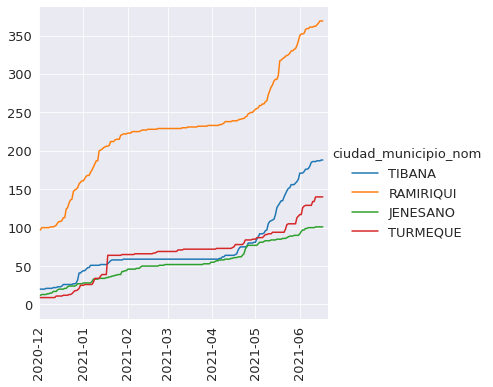

In [26]:
towns = ["TIBANA", "RAMIRIQUI", "JENESANO","TURMEQUE"]
g = sns.relplot(data=r_cum_notified_cases[towns],
           kind='line',
           dashes=False)

plt.xlim([np.datetime64("2020-12-01"),download_date])
plt.xticks(rotation=90)

In [27]:
print(r_cum_notified_cases[towns].iloc[-1])

ciudad_municipio_nom
TIBANA       188.0
RAMIRIQUI    369.0
JENESANO     101.0
TURMEQUE     140.0
Name: 2021-06-17 00:00:00, dtype: float64


In [28]:
n_entries_from_ts = r_cum_notified_cases.T.iloc[:,-1]
print(n_entries_from_ts)

ciudad_municipio_nom
ALMEIDA            62.0
AQUITANIA         215.0
ARCABUCO          160.0
BELEN             244.0
BERBEO             28.0
                  ...  
UMBITA            104.0
VENTAQUEMADA      217.0
VILLA DE LEYVA    773.0
VIRACACHA          27.0
ZETAQUIRA          36.0
Name: 2021-06-17 00:00:00, Length: 123, dtype: float64


In [29]:
n_entries = df.pivot_table(index="ciudad_municipio_nom", 
                                  values="id_de_caso",  
                                  aggfunc=np.count_nonzero)
print(n_entries)

                      id_de_caso
ciudad_municipio_nom            
ALMEIDA                       62
AQUITANIA                    215
ARCABUCO                     160
BELEN                        244
BERBEO                        28
...                          ...
UMBITA                       104
VENTAQUEMADA                 217
VILLA DE LEYVA               773
VIRACACHA                     27
ZETAQUIRA                     36

[123 rows x 1 columns]


In [30]:
# Print difference of reported cases computed with the two methods
# All should be 0
verify = np.array(n_entries_from_ts) - np.array(n_entries.id_de_caso)
print(verify, np.shape(verify))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.] (123,)


# Recuperation period

In [31]:
recuperados = df.query("recuperado=='Recuperado'")
recuperados["Periodo_recuperacion"] = (recuperados["f_recuperacion"] - recuperados["f_ini_sintomas"])/np.timedelta64(1, 'D')

<ipython-input-31-2225461d1d66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recuperados["Periodo_recuperacion"] = (recuperados["f_recuperacion"] - recuperados["f_ini_sintomas"])/np.timedelta64(1, 'D')


In [32]:
recuperados["Periodo_recuperacion"].describe()

count    75241.000000
mean        21.648157
std         23.916866
min          1.000000
25%         14.000000
50%         17.000000
75%         19.000000
max        349.000000
Name: Periodo_recuperacion, dtype: float64

(0.0, 50.0)

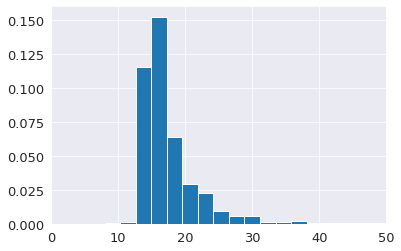

In [33]:
plt.hist(recuperados["Periodo_recuperacion"], bins=150, density=True)
plt.xlim([0,50])

(array([2.54026317e-04, 0.00000000e+00, 4.23377195e-04, 6.77403512e-04,
        1.27013159e-03, 2.03221054e-03, 2.70961405e-03, 5.84260529e-03,
        7.19741232e-03, 1.08384562e-02, 1.87979475e-02, 2.29470440e-02,
        2.43865264e-02, 2.02374299e-02, 2.46405528e-02, 2.39631492e-02,
        1.27859913e-02, 5.41922810e-03, 6.77403512e-04, 8.46754390e-05]),
 array([  1. ,   6.4,  11.8,  17.2,  22.6,  28. ,  33.4,  38.8,  44.2,
         49.6,  55. ,  60.4,  65.8,  71.2,  76.6,  82. ,  87.4,  92.8,
         98.2, 103.6, 109. ]),
 <BarContainer object of 20 artists>)

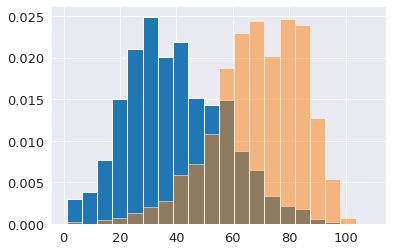

In [34]:
_, bins, _ = plt.hist(df.query("recuperado=='Recuperado'")["edad"], density=True, bins=20)
plt.hist(df.query("recuperado=='Fallecido'")["edad"], density=True, bins=bins, alpha=0.5)

# To Fix
* Define a Palette to show in red the town with most cases.
* Define if Palette is for showing scale or id
* Define if use positon for ID
* Think on processing counts by 1000 people.
* Plan a new visualization involving age